#### Manifold Learning

- 높은 차원의 데이터를 저차원으로 축소하는 방법
- 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능함

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

C:\Users\jjong\AppData\Local\Temp\ipykernel_19980\4109216805.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [2]:
s_curve, color = datasets.make_s_curve(1000, random_state=42)

In [4]:
digits, labels = datasets.load_digits(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=42)
projected_digits = rand_proj.fit_transform(digits)

In [12]:
def min_max_scale(x):
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x-min_value) / (max_value - min_value)
    return x

In [17]:
def plot_s_curve(s_curve, color, position, projection):
    s_curve = min_max_scale(s_curve)
    if projection =='3d':
        ax = plt.subplot(position, projection = projection)
        ax.scatter(s_curve[:,0], s_curve[:,1], s_curve[:,2], c=color, cmap=plt.cm.Spectral)
        ax.view_init(4, -72)
    elif projection =='2d':
        ax = plt.subplot(position)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)

In [18]:
def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    if projection == '3d':
        ax = plt.subplot(position, projection = projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], digits[i,2], str(labels[i]), color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold','size':9})
        ax.view_init(4,-72)
    elif projection =='2d':
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], str(labels[i]), color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold','size':9})

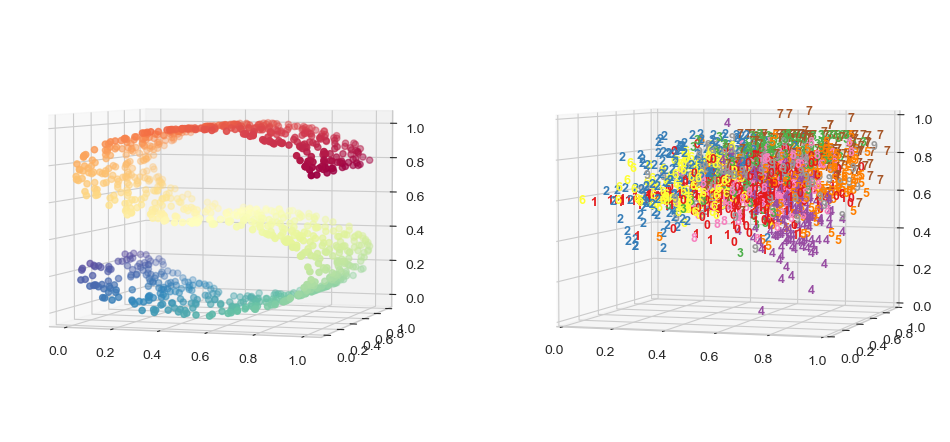

In [21]:
# Representation 3d

fig = plt.figure(figsize=(12,8))
plot_s_curve(s_curve,color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

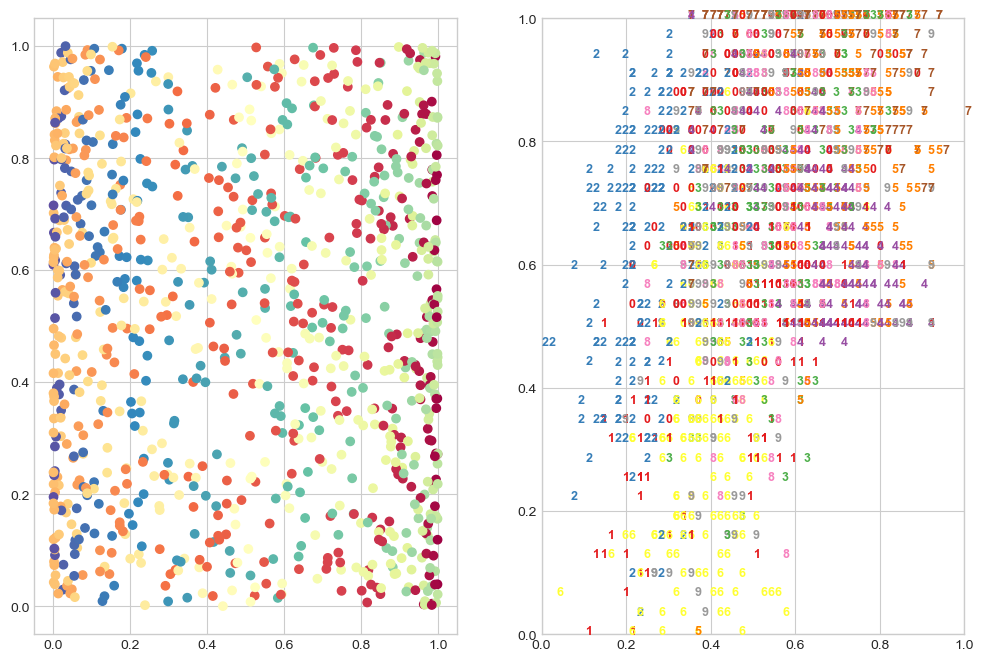

In [22]:
# Representation 2d

fig = plt.figure(figsize=(12,8))
plot_s_curve(s_curve,color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

#### Locally Linear Embedding (LLE)

- 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [37]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='standard',random_state=42).fit_transform(s_curve)

digits_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='standard', random_state=42).fit_transform(digits)

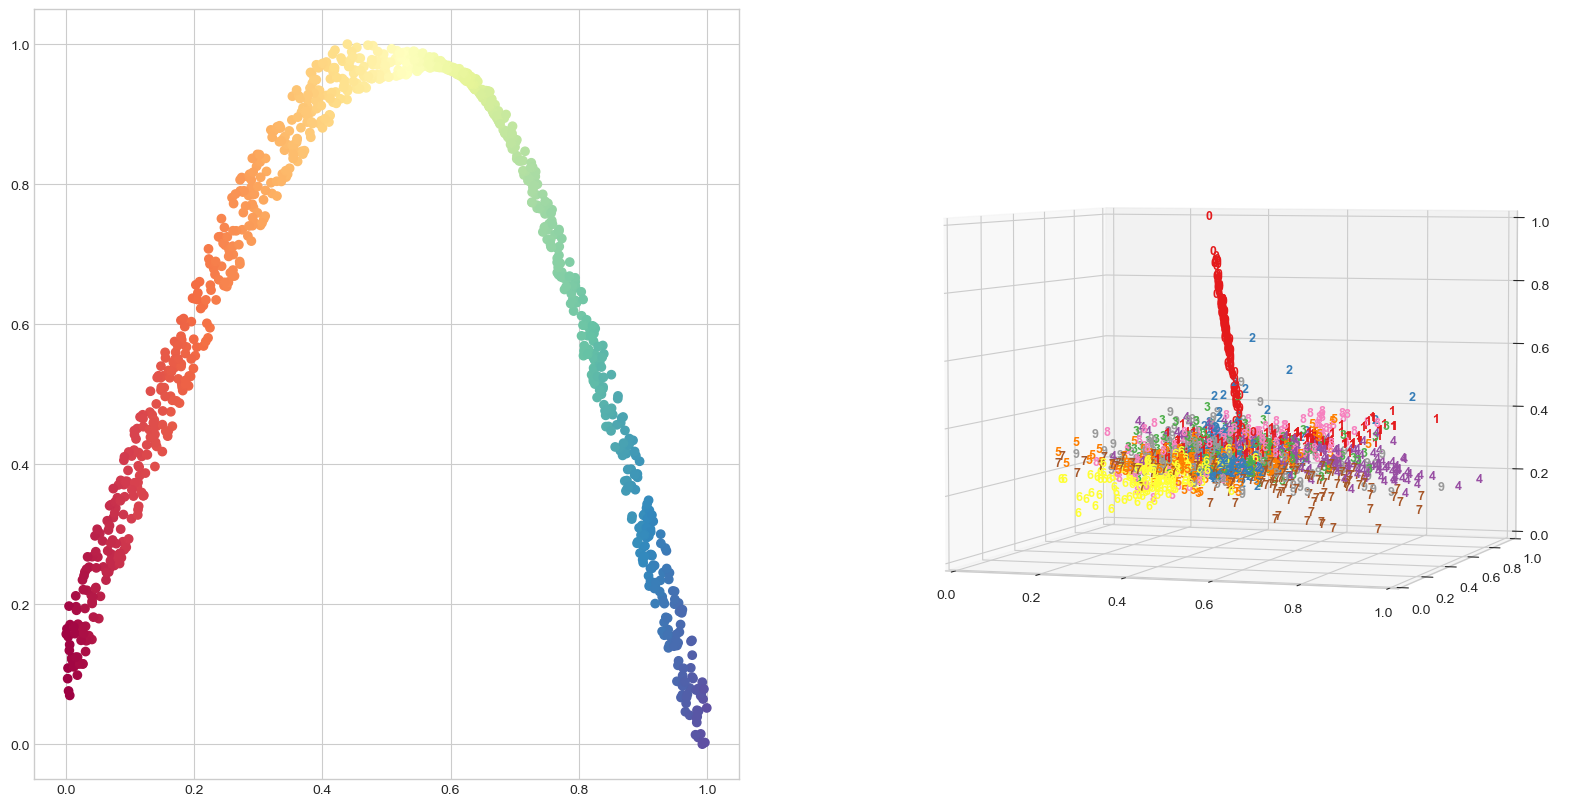

In [39]:
fig =plt.figure(figsize=(20,10))
plot_s_curve(s_curve_lle,color, 121, '2d')
plot_digits(digits_lle,labels, 122,'3d')

#### Local Tangent Space Alignment (LTSA)

- tangent 공간을 통해 각 이웃의 국소 성질을 특성화
- 국소 tangent 공간을 정렬함

In [45]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='ltsa', random_state=42).fit_transform(s_curve)
digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='ltsa', random_state=42).fit_transform(digits)

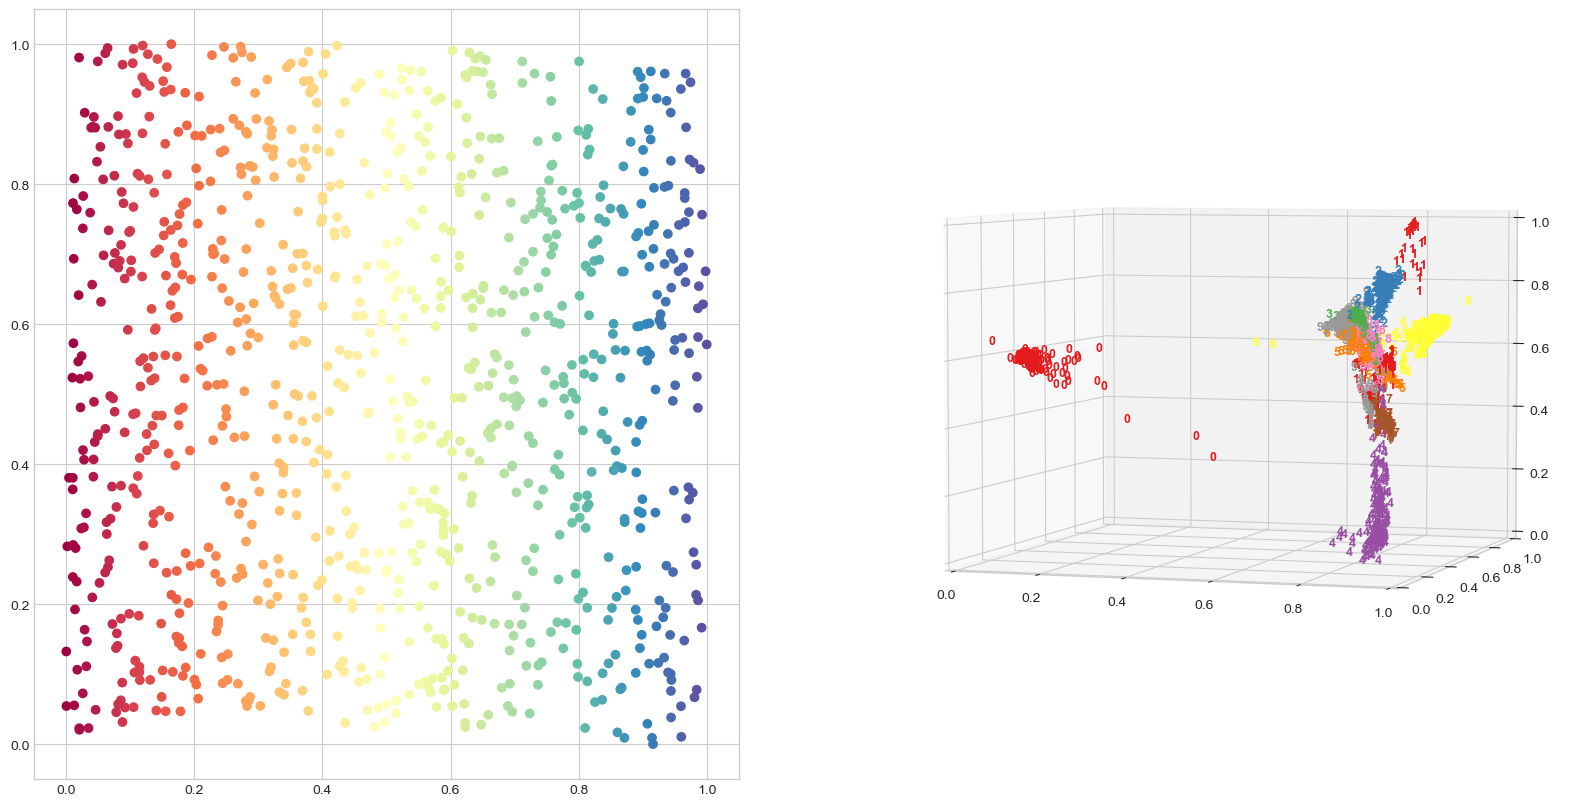

In [46]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_ltsa, color, 121, '2d')
plot_digits(digits_ltsa, labels, 122, '3d')

#### Hessian Eigenmapping

- LLE의 문제를 해결한 방법
- 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 2차 형태를 중심으로 회전

In [47]:
s_curve_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='hessian', random_state=42).fit_transform(s_curve)
digits_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='hessian', random_state=42).fit_transform(digits)

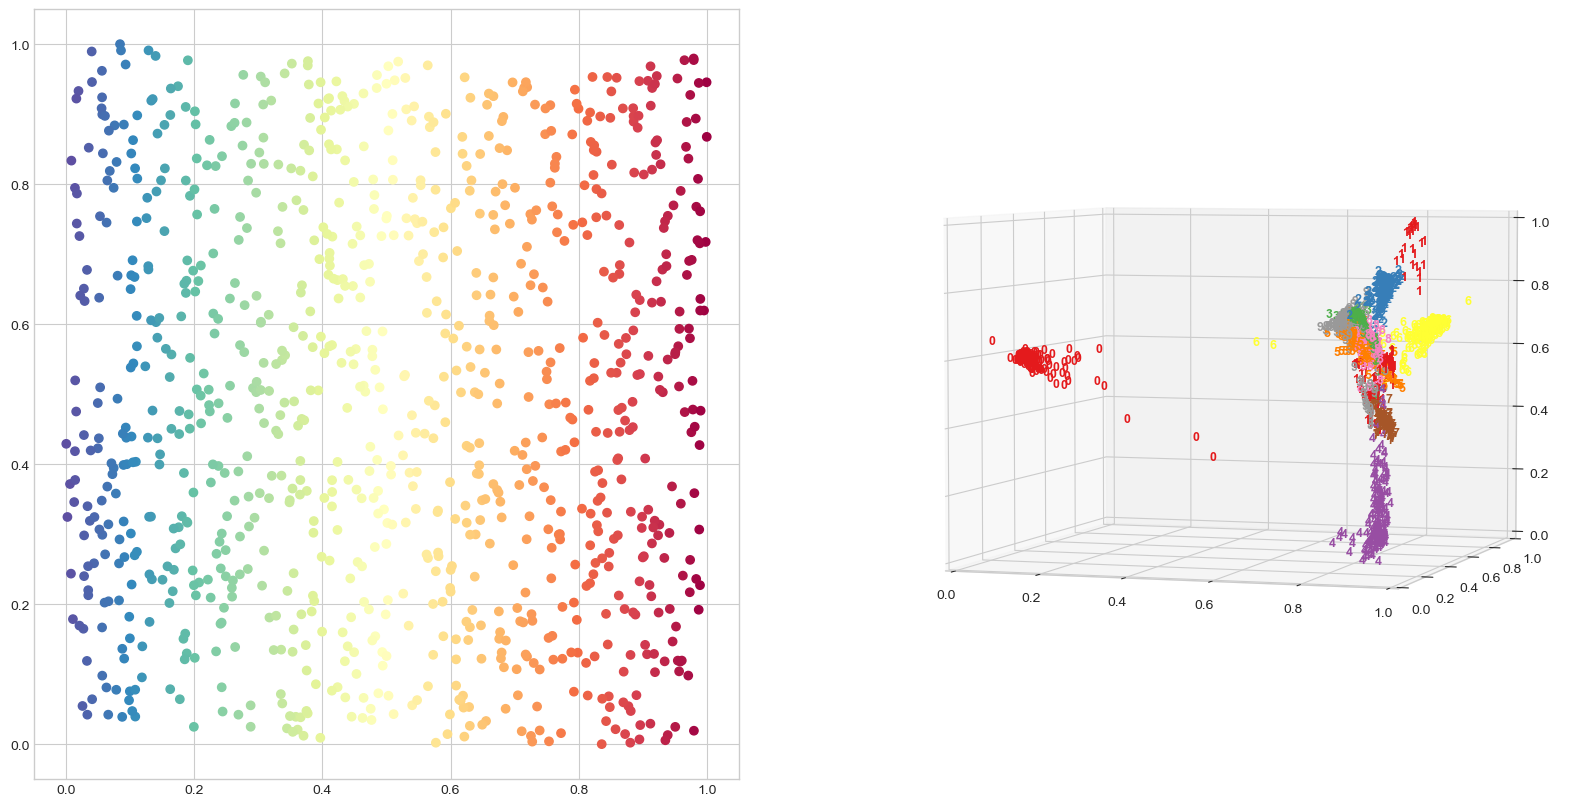

In [48]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_hlle, color, 121, '2d')
plot_digits(digits_hlle, labels, 122, '3d')

#### Modified Locally Linear Embedding

- 각 이웃에 여러 가중치 벡터를 사용
- n_neighbors > n_components를 만족해야함

In [49]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='modified', random_state=42).fit_transform(s_curve)
digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='modified', random_state=42).fit_transform(digits)

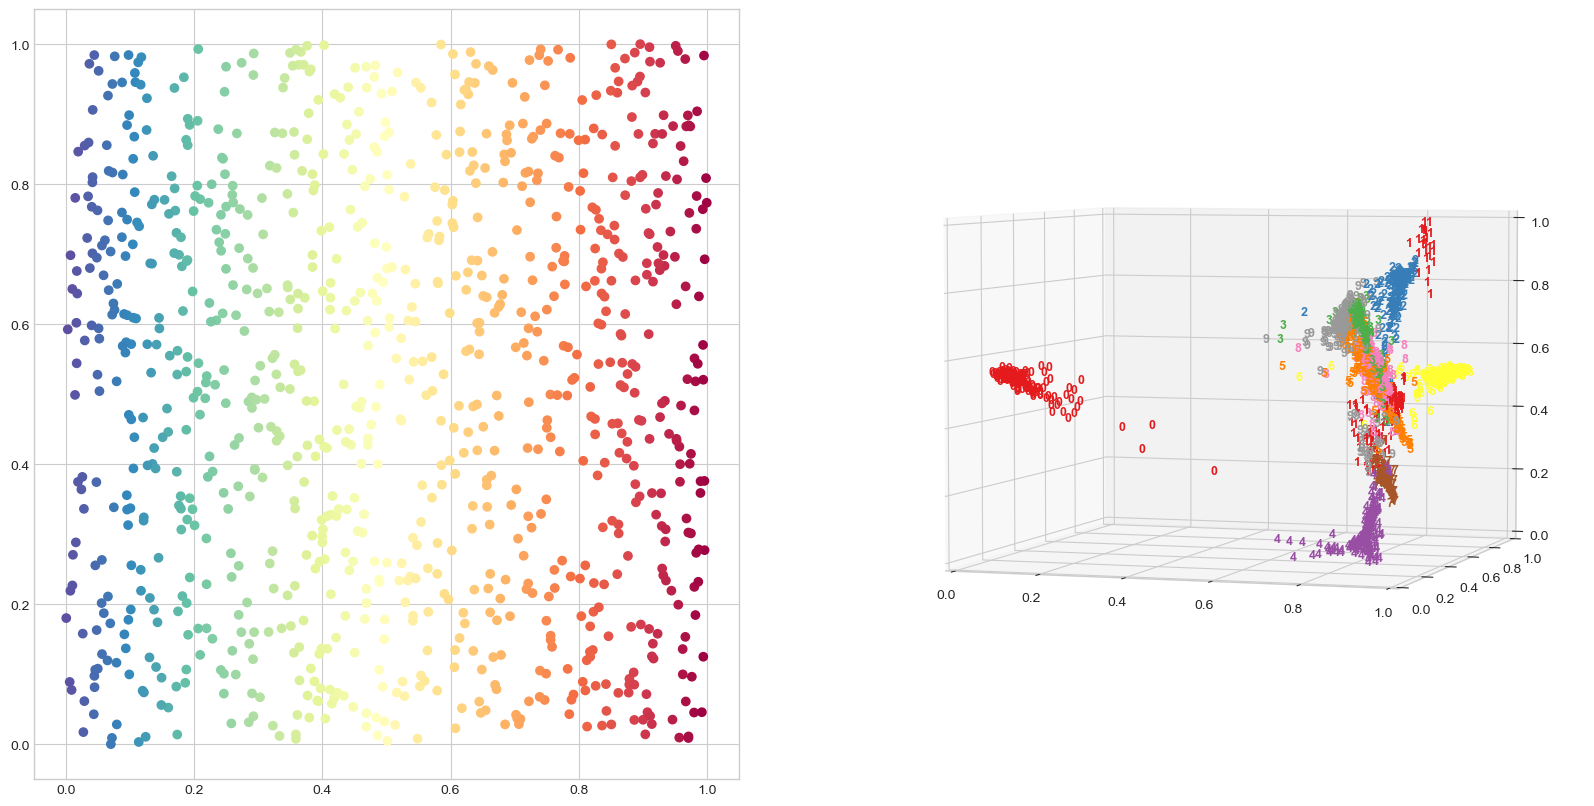

In [50]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_digits(digits_mlle, labels, 122, '3d')

#### Isomap

- 초기의 다양체 학습 알고리즘
- MDS와 커널 PCA의 확장으로 볼 수 있음
- 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [51]:
s_curve_isomap = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)
digits_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(digits)

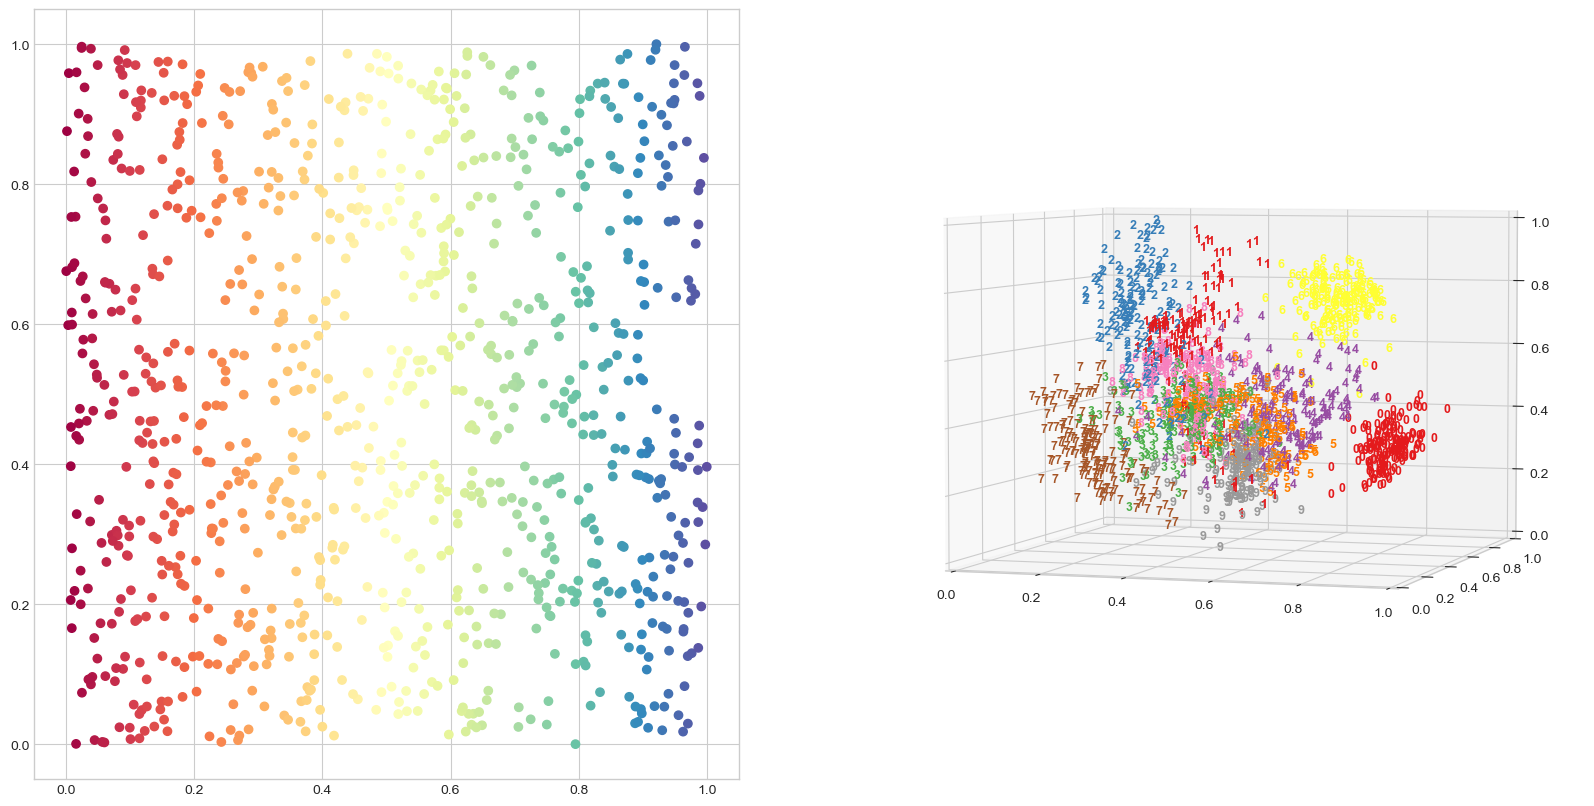

In [53]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_digits(digits_isomap, labels, 122, '3d')

#### Multi-Dimensional Scaling (MDS)

- 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

In [56]:
s_curve_mds = manifold.MDS(n_components=2, random_state=42).fit_transform(s_curve)
digits_mds = manifold.MDS(n_components=3, random_state=42).fit_transform(digits)

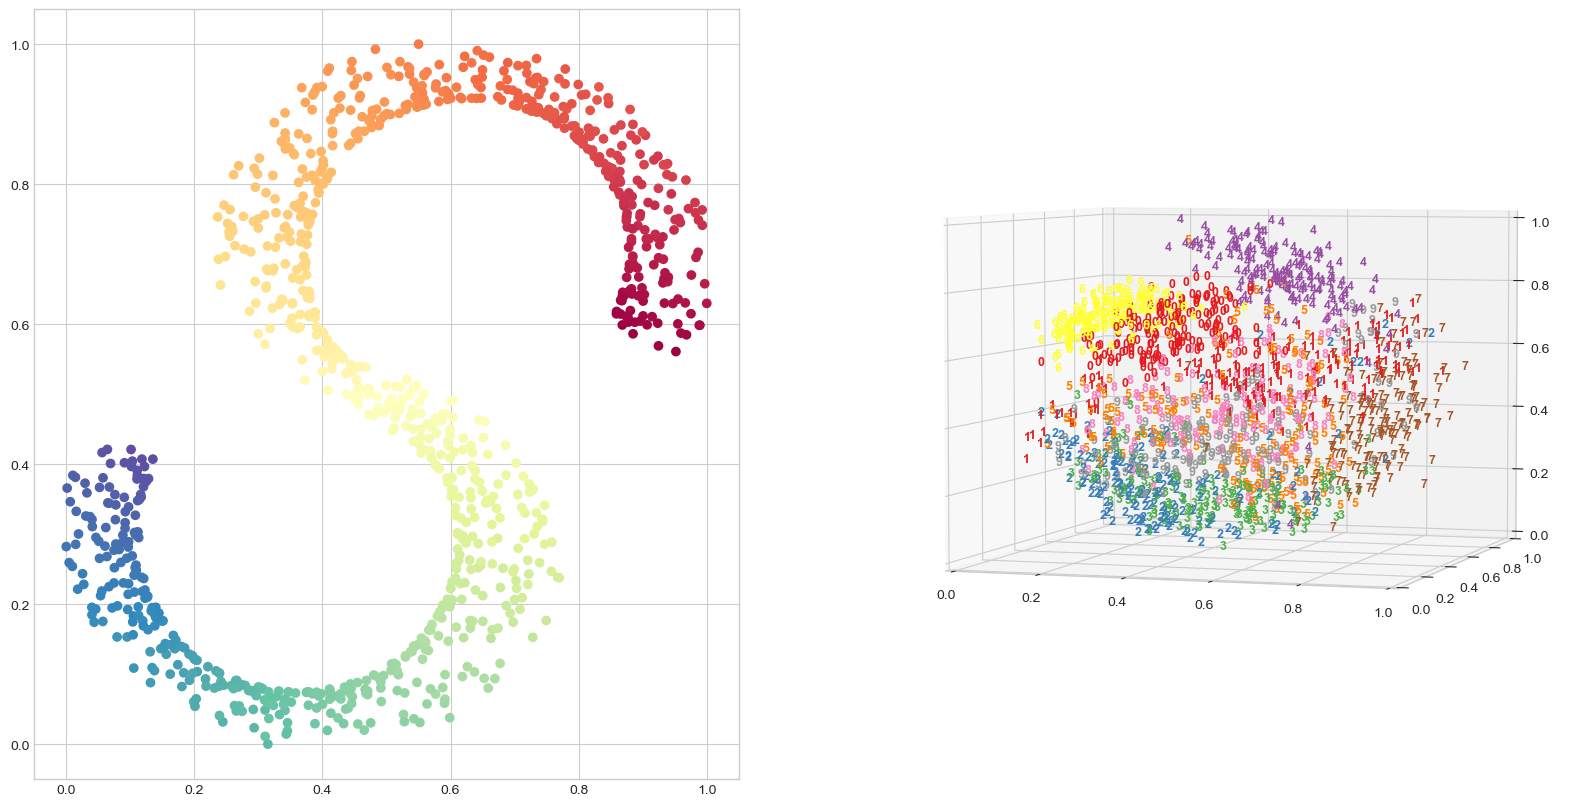

In [57]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_mds, color, 121, '2d')
plot_digits(digits_mds, labels, 122, '3d')

#### Spectral Embedding

- 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
- 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [61]:
s_curve_spectral = manifold.SpectralEmbedding(n_components=2, random_state=42).fit_transform(s_curve)
digits_spectral = manifold.SpectralEmbedding(n_components=3, random_state=42).fit_transform(digits)

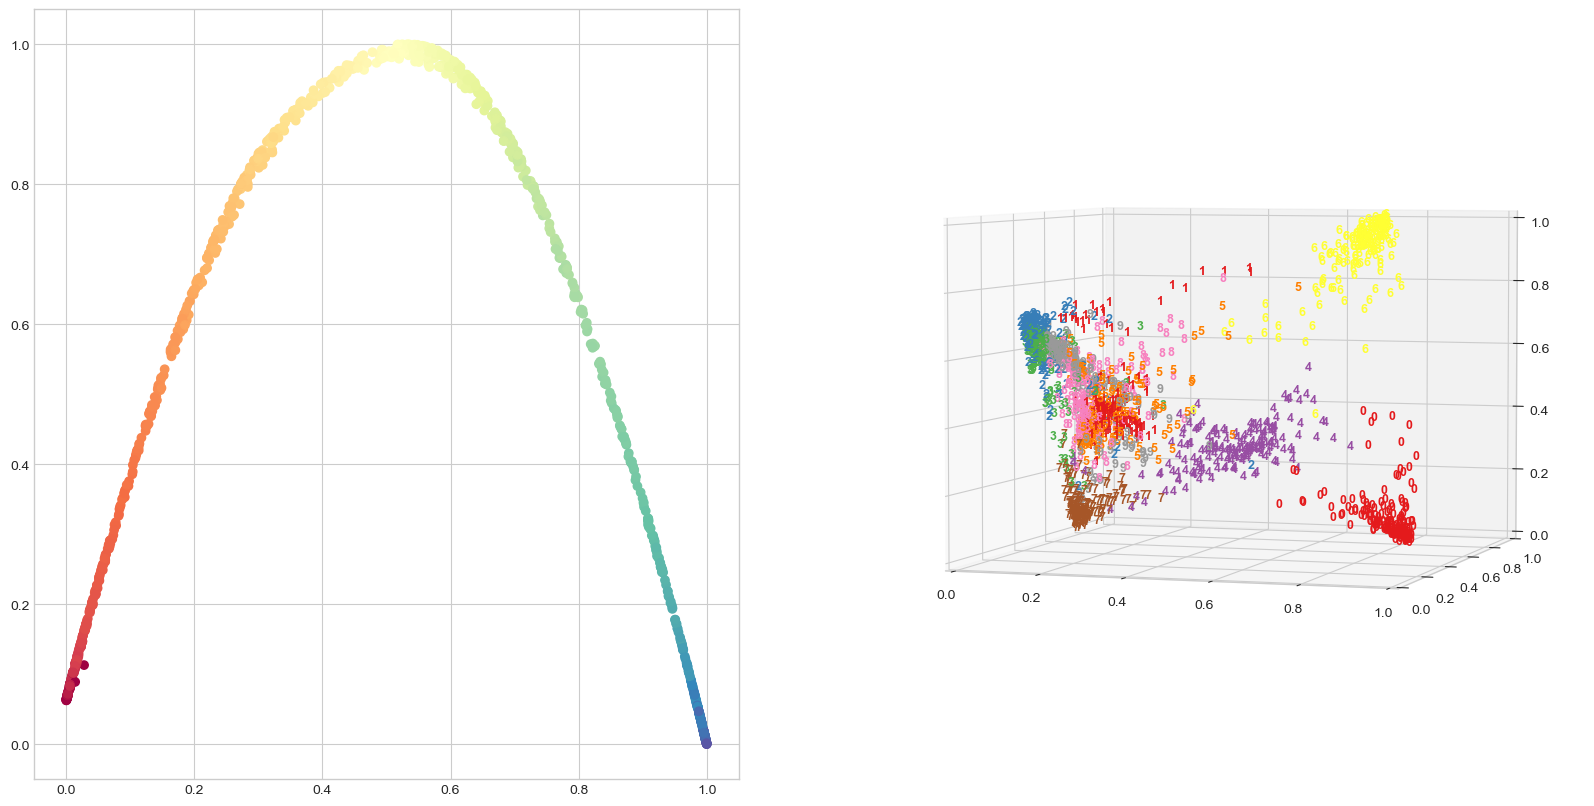

In [62]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_spectral, color, 121, '2d')
plot_digits(digits_spectral, labels, 122, '3d')

#### t-distributed Stochastic Neighbor Embedding (t-SNE)

- 데이터 포인트의 유사성을 확률로 변환
- 국소 구조에 민감
- 국소 구조를 기반으로 샘플 그룹을 추가하는데 강함
- 항상 KL발산의 국소 최소값에서 끝남
- 계산 비용이 많이듬
- 전역 구조를 보존하지 않음

In [63]:
s_curve_tsne = manifold.TSNE(n_components=2, random_state=42).fit_transform(s_curve)
digits_tsne = manifold.TSNE(n_components=3, random_state=42).fit_transform(digits)

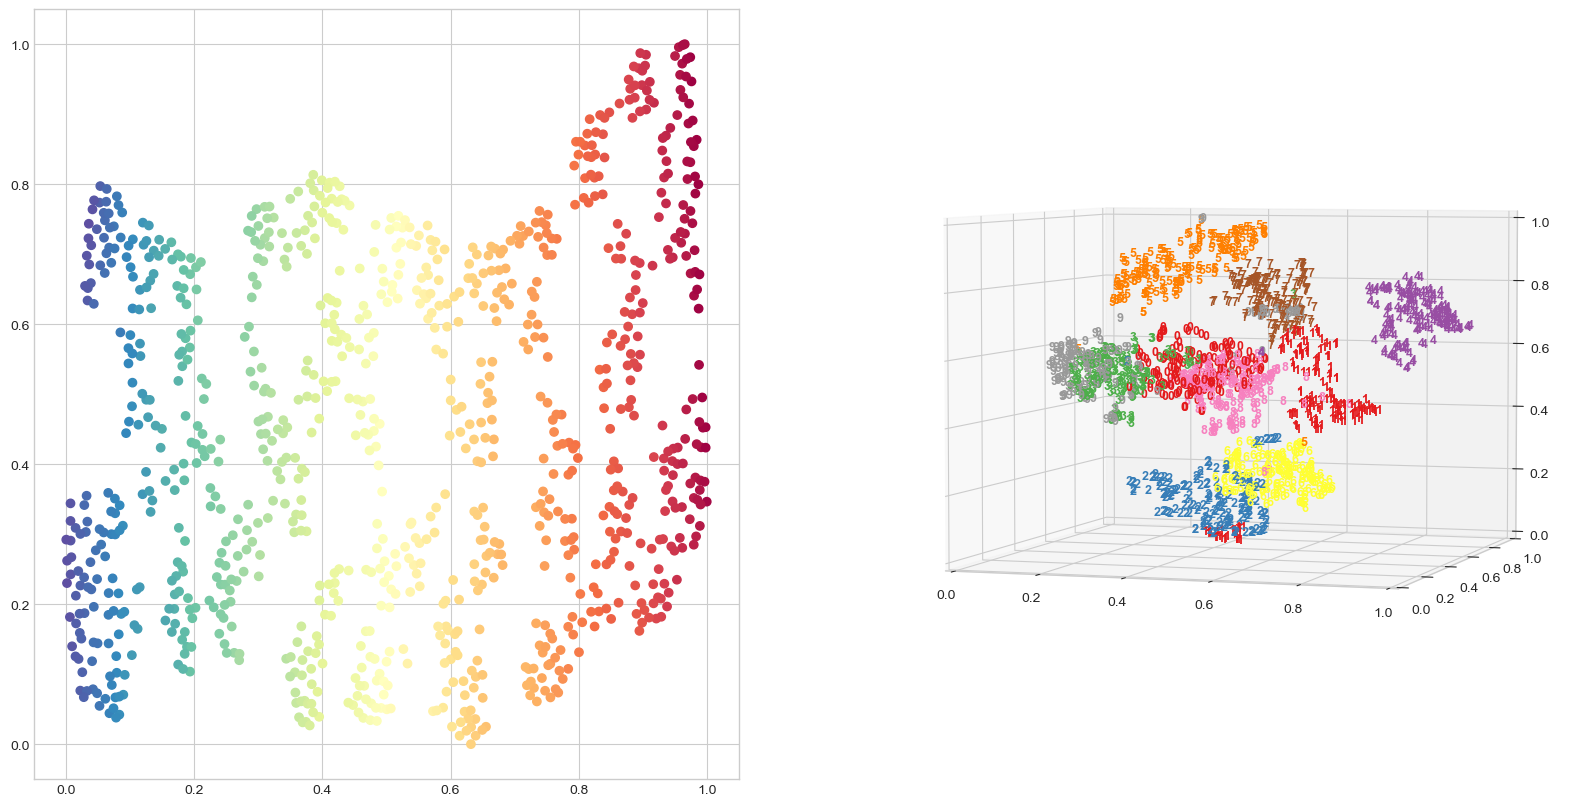

In [64]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_tsne, color, 121, '2d')
plot_digits(digits_tsne, labels, 122, '3d')

#### 정제된 표현을 이용한 학습

- 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음.
- 정제된 표현이기 때문에 분석에 비교적 용이함.
- 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [66]:
raw_digits, target = datasets.load_digits(return_X_y=True)

In [69]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

#### 원본 데이터를 사용할 때

In [78]:
# KNN

raw_score = cross_val_score(
    estimator=knn,
    X=raw_digits, y=target,
    cv=5
)
raw_score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [71]:
print(f'mean cross val score : {score.mean()} (+/- {score.std()})')

mean cross val score : 0.9627282575054161 (+/- 0.011168537355954218)


In [80]:
# SVM

raw_score = cross_val_score(
    estimator=svm,
    X=raw_digits, y=target,
    cv=5
)

In [85]:
# decision tree

raw_score = cross_val_score(
    estimator=decision_tree,
    X=raw_digits, y=target,
    cv=5
)

In [87]:
# random forest

raw_score = cross_val_score(
    estimator=random_forest,
    X=raw_digits, y=target,
    cv=5
)

#### 정제된 데이터를 사용할 때

In [79]:
# knn

pre_score = cross_val_score(
    estimator=knn,
    X=digits_tsne, y=target,
    cv=5
)
print(f'mean cross val raw_score : {raw_score.mean()} (+/- {raw_score.std()})')
print(f'mean cross val pre_score : {pre_score.mean()} (+/- {pre_score.std()})')

mean cross val raw_score : 0.9627282575054161 (+/- 0.011168537355954218)
mean cross val pre_score : 0.9816388115134634 (+/- 0.006714903168721531)


In [81]:
# svm

pre_score = cross_val_score(
    estimator=svm,
    X=digits_tsne, y=target,
    cv=5
)
print(f'mean cross val raw_score : {raw_score.mean()} (+/- {raw_score.std()})')
print(f'mean cross val pre_score : {pre_score.mean()} (+/- {pre_score.std()})')

mean cross val raw_score : 0.9632838130609718 (+/- 0.02008605863225686)
mean cross val pre_score : 0.9721928195605075 (+/- 0.01370211121019634)


In [86]:
# decision tree

pre_score = cross_val_score(
    estimator=decision_tree,
    X=digits_tsne, y=target,
    cv=5
)
print(f'mean cross val raw_score : {raw_score.mean()} (+/- {raw_score.std()})')
print(f'mean cross val pre_score : {pre_score.mean()} (+/- {pre_score.std()})')

mean cross val raw_score : 0.7891318477251625 (+/- 0.03547921894213946)
mean cross val pre_score : 0.9488378211080161 (+/- 0.042816380474828206)


In [88]:
# random forest

pre_score = cross_val_score(
    estimator=random_forest,
    X=digits_tsne, y=target,
    cv=5
)
print(f'mean cross val raw_score : {raw_score.mean()} (+/- {raw_score.std()})')
print(f'mean cross val pre_score : {pre_score.mean()} (+/- {pre_score.std()})')

mean cross val raw_score : 0.9399148870318788 (+/- 0.021983631397488664)
mean cross val pre_score : 0.9694134942742185 (+/- 0.01906685356088096)
